In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

## Step1: Import the Data 

In [4]:
#Read the dataset
leadscore = pd.read_csv('D:\Revanth\Data_Science\Machine Learning\Logistic_Regression\Assignment\Leads.csv')
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [5]:
leadscore.shape

(9240, 37)

#### It consists of 37 columns and 9240 rows of data. 

#### Some columns have a Select option. Must be converted to null data as 'NaN'.

#### We need to find 'Select' optioned columns.

In [6]:
column_names = leadscore.columns

In [7]:
column_names

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# list of all columns contain 'Select'
for i in range(len(column_names)):
    print(column_names[i], len(leadscore[leadscore[column_names[i]] == 'Select']))

Prospect ID 0
Lead Number 0
Lead Origin 0
Lead Source 0
Do Not Email 0
Do Not Call 0
Converted 0
TotalVisits 0
Total Time Spent on Website 0
Page Views Per Visit 0
Last Activity 0
Country 0
Specialization 1942
How did you hear about X Education 5043
What is your current occupation 0
What matters most to you in choosing a course 0
Search 0
Magazine 0
Newspaper Article 0
X Education Forums 0
Newspaper 0
Digital Advertisement 0
Through Recommendations 0
Receive More Updates About Our Courses 0
Tags 0
Lead Quality 0
Update me on Supply Chain Content 0
Get updates on DM Content 0
Lead Profile 4146
City 2249
Asymmetrique Activity Index 0
Asymmetrique Profile Index 0
Asymmetrique Activity Score 0
Asymmetrique Profile Score 0
I agree to pay the amount through cheque 0
A free copy of Mastering The Interview 0
Last Notable Activity 0


In [9]:
# list of all columns contain 'select'
for i in range(len(column_names)):
    print(column_names[i], len(leadscore[leadscore[column_names[i]] == 'select']))

Prospect ID 0
Lead Number 0
Lead Origin 0
Lead Source 0
Do Not Email 0
Do Not Call 0
Converted 0
TotalVisits 0
Total Time Spent on Website 0
Page Views Per Visit 0
Last Activity 0
Country 0
Specialization 0
How did you hear about X Education 0
What is your current occupation 0
What matters most to you in choosing a course 0
Search 0
Magazine 0
Newspaper Article 0
X Education Forums 0
Newspaper 0
Digital Advertisement 0
Through Recommendations 0
Receive More Updates About Our Courses 0
Tags 0
Lead Quality 0
Update me on Supply Chain Content 0
Get updates on DM Content 0
Lead Profile 0
City 0
Asymmetrique Activity Index 0
Asymmetrique Profile Index 0
Asymmetrique Activity Score 0
Asymmetrique Profile Score 0
I agree to pay the amount through cheque 0
A free copy of Mastering The Interview 0
Last Notable Activity 0


#### We have only 'Select' word in some columns. We need to replace it with NaN 

In [10]:
help(leadscore.replace)

Help on method replace in module pandas.core.frame:

replace(to_replace=None, value=<no_default>, inplace: 'bool' = False, limit=None, regex: 'bool' = False, method: 'str | lib.NoDefault' = <no_default>) method of pandas.core.frame.DataFrame instance
    Replace values given in `to_replace` with `value`.
    
    Values of the DataFrame are replaced with other values dynamically.
    
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
     

In [11]:
leadscore = leadscore.replace(to_replace='Select', value = np.nan)

In [12]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Some columns do not contain data because the values are less than 9240.

In [14]:
leadscore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
len(leadscore)

9240

In [16]:
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Need to drop columns having missing value percentage > 40%

In [17]:
leadscore = leadscore.loc[:, round(((leadscore.isnull().sum())/(len(leadscore)))*100,2) < 40]

In [18]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [19]:
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### City Column

In [20]:
leadscore['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
leadscore['City'].isnull().sum()

3669

#### There are 3669 rows of data is missing in City column and here we can replace these missing values with most popular one i.e 'Mumbai' 

In [22]:
leadscore['City'].fillna('Mumbai', inplace = True)

In [23]:
leadscore['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Lets plot a countplot between City and with target column Converted

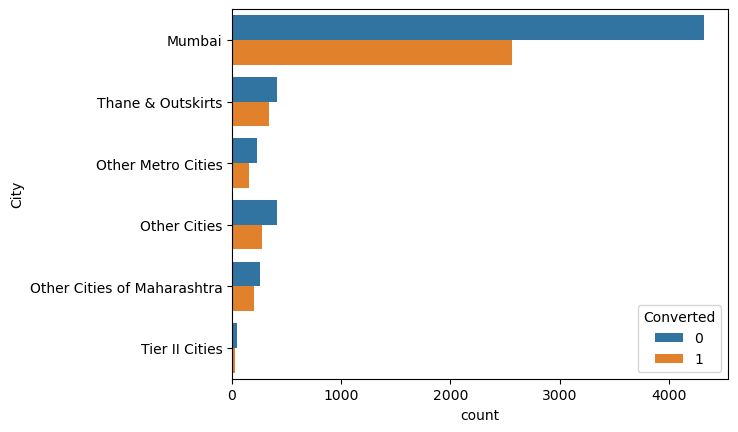

In [24]:
sns.countplot(y = leadscore['City'], hue = leadscore['Converted'])
plt.show()

#### From above graph, Mumbai has got high number of leads converted to yes as compared to other cities.

In [25]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Specialization Column

In [26]:
leadscore['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [27]:
leadscore['Specialization'].isnull().sum()

3380

#### We can fill null values as 'Others' in specialization column

In [28]:
leadscore['Specialization'].fillna('Others', inplace = True)

In [29]:
leadscore['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Lets plot a countplot between Specialization and with target column Converted

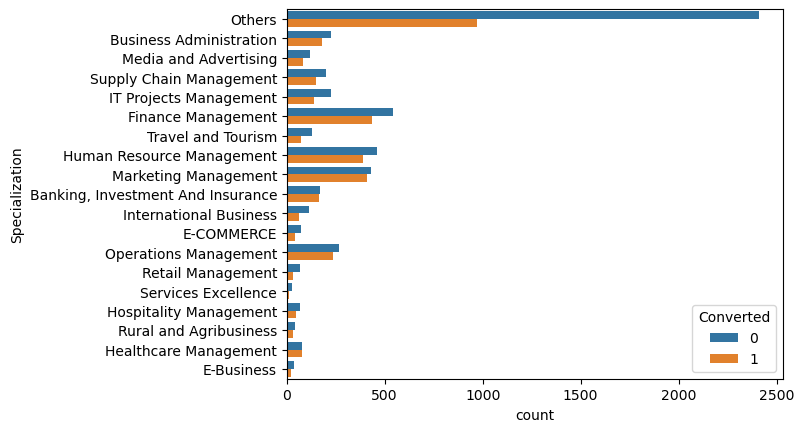

In [30]:
sns.countplot(y = leadscore['Specialization'], hue = leadscore['Converted'])
plt.show()

#### Apart from others column, Finance, Human Resource and Marketing were interested to convert into yes.

In [31]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Tags

In [32]:
leadscore['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [33]:
leadscore['Tags'].isnull().sum()

3353

#### We can fill null values as 'Others' in Tags column

In [34]:
leadscore['Tags'].fillna('Others', inplace=True)

In [35]:
leadscore['Tags'].value_counts()

Others                                               3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### Lets plot a countplot between Tags and with target column Converted

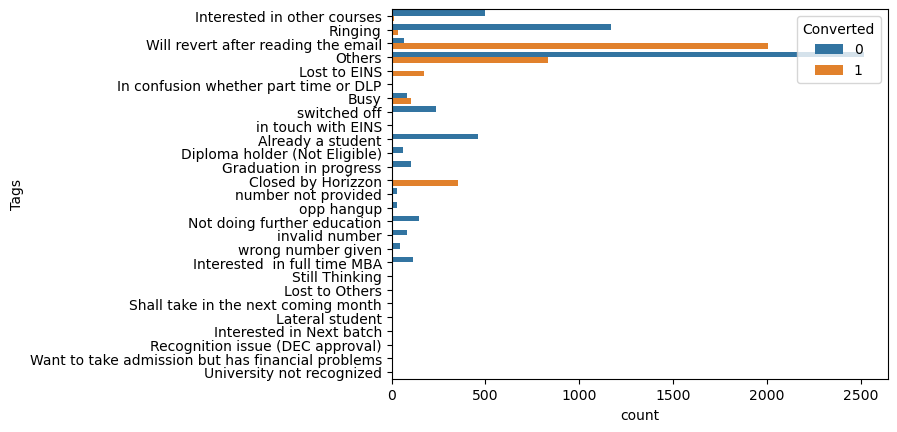

In [36]:
sns.countplot(y = leadscore['Tags'], hue = leadscore['Converted'])
plt.show()

#### Maximum no. of customers belong to 'Tag: Will revert after reading the email' and were got converted into yes

In [37]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Column: What matters most to you in choosing a course

In [38]:
leadscore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
leadscore['What matters most to you in choosing a course'].isnull().sum()

2709

#### We will fill null values by 'Better Career Prospects' as it is very popular.

In [40]:
leadscore['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [41]:
leadscore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Column: What is your current occupation

In [43]:
leadscore['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [44]:
leadscore['What is your current occupation'].isnull().sum()

2690

#### We will fill null values by 'Unemployed' as it is very popular.

In [45]:
leadscore['What is your current occupation'].fillna('Unemployed', inplace=True)

In [46]:
leadscore['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Lets plot a countplot between 'What is your current occupation' column and with target column Converted

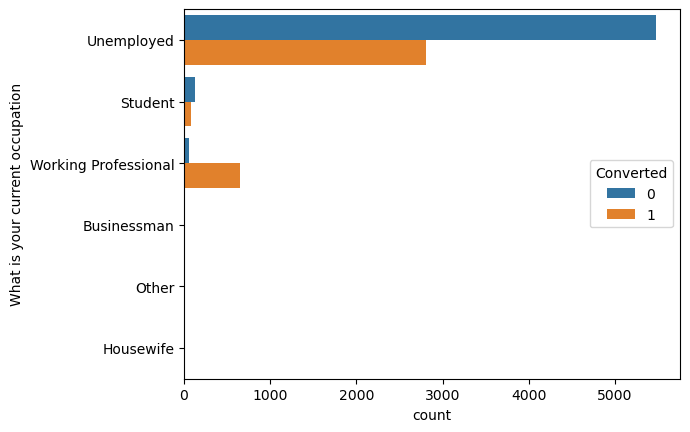

In [47]:
sns.countplot(y = leadscore['What is your current occupation'], hue = leadscore['Converted'])
plt.show()

#### If we observe above graph, between Yes and No, Working Profesional seems to be more interested than all as their Yes is more. It seems for better career propects, they are seems to be interested.

In [48]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Column: Country

In [49]:
leadscore['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [50]:
leadscore['Country'].isnull().sum()

2461

#### We will fill null values by 'India' as it is very popular.

In [51]:
leadscore['Country'].fillna('India', inplace=True)

In [52]:
leadscore['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### In country column, There are many countries which has value <= 10. Lets compbines these and named them as Others 

In [53]:
leadscore['Country'].replace(['Qatar', 'Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown',
                              'South Africa', 'Nigeria', 'Germany', 'Kuwait', 'Canada', 'Sweden',
                              'China', 'Asia/Pacific Region', 'Uganda', 'Bangladesh', 'Italy',
                              'Belgium', 'Netherlands', 'Ghana', 'Philippines', 'Russia', 'Switzerland',
                              'Vietnam', 'Denmark', 'Tanzania', 'Liberia', 'Malaysia', 'Kenya', 'Sri Lanka',
                              'Indonesia'],'Others', inplace=True)

In [54]:
leadscore['Country'].value_counts()

India                   8953
Others                    92
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Name: Country, dtype: int64

In [55]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

#### Lets check column Prospect ID and Lead Number

In [56]:
leadscore['Prospect ID'].value_counts()

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64

In [57]:
leadscore['Lead Number'].value_counts()

660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64

#### It seems above two columns were unique. Lets drop it as there is no use of above two columns.

In [58]:
leadscore.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [59]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### Some columns having missing values percentage is < 2%. We can delete those rows particularly. 

In [60]:
leadscore = leadscore.dropna()

In [61]:
#Now Check again null values in all columns
round(((leadscore.isnull().sum())/(len(leadscore)))*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [62]:
leadscore.shape

(9074, 28)

#### Finally we have data which consists of all rows and columns without missing data.
#### Now It has 9074 rows and 28 columns of data finally.

In [63]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

#### Lets see some numerical data.

In [64]:
leadscore.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


#### Lets plot boxplot to see numerical columns

#### Boxplot on TotalVisits column

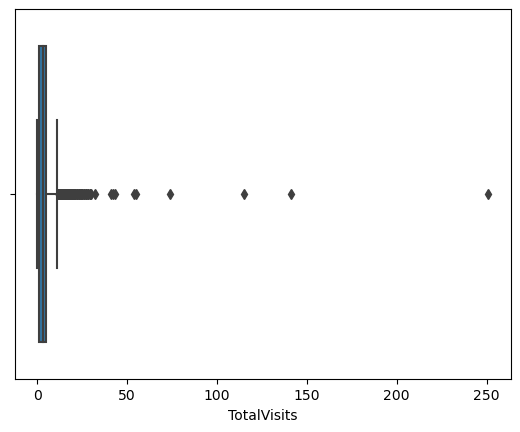

In [65]:
sns.boxplot(leadscore['TotalVisits'])
plt.show()

In [66]:
# There seems to have oultliers present in total visits column.
leadscore['TotalVisits'].describe(percentiles=[0.05,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

####  Outliers in TotalVisits column
1. The difference between the maximum value and the 99th percentile is too high.
2. The difference between the 99th percentile value and the 95th percentile value of the balance variable is in the normal range, meaning it is not too high.
This shows outliers in TotalVisits column.

#### Now, Above 99% of data needs to removed in column 'TotalVisits'

In [67]:
leadscore = leadscore[leadscore['TotalVisits'] < 17]

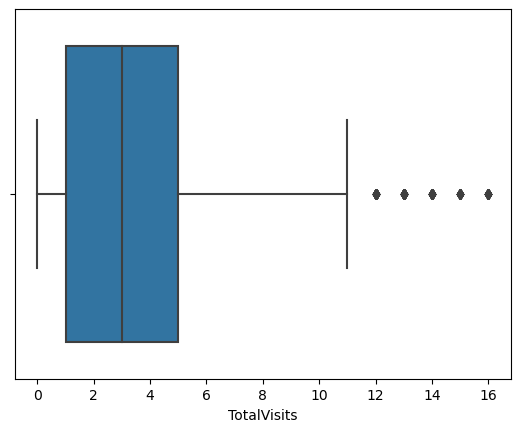

In [68]:
sns.boxplot(leadscore['TotalVisits'])
plt.show()

Data seems to be fine now.

#### Boxplot on Total Time Spent on Website column

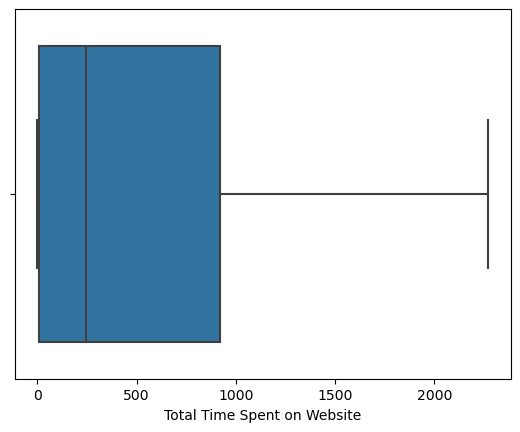

In [69]:
sns.boxplot(leadscore['Total Time Spent on Website'])
plt.show()

In [70]:
leadscore['Total Time Spent on Website'].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    8975.000000
mean      481.180724
std       545.041857
min         0.000000
5%          0.000000
25%         8.500000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.000000
99%      1837.520000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

#### By looking on tables, both boxplot and tables seems to be fine. The difference between the maximum value and the 99th percentile is not too high. There are no outliers for 'Total Time Spent on Website' column.

#### Boxplot: Page Views Per Visit

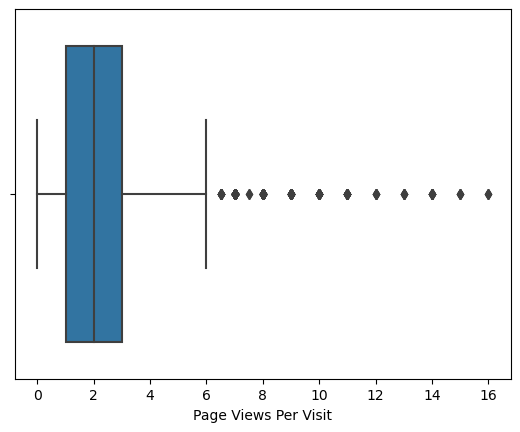

In [71]:
sns.boxplot(leadscore['Page Views Per Visit'])
plt.show()

In [72]:
leadscore['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    8975.000000
mean        2.341840
std         2.060971
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

####  Outliers in Page Views Per Visit column
1. The difference between the maximum value and the 99th percentile is too high.
2. The difference between the 99th percentile value and the 95th percentile value of the balance variable is in the normal range, meaning it is not too high.
This shows outliers in Page Views Per Visit column.

#### Now, Above 99% of data needs to removed in column 'Page Views Per Visit'

In [73]:
leadscore = leadscore[leadscore['Page Views Per Visit'] < 9]

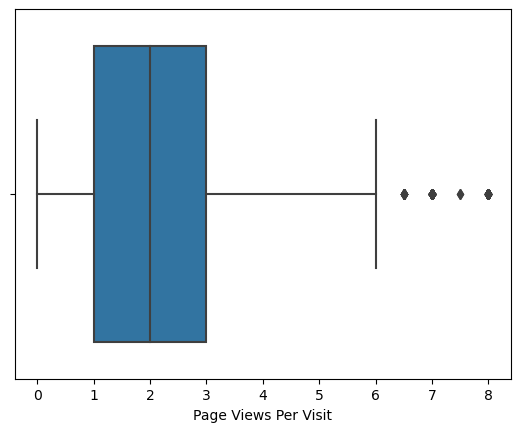

In [74]:
sns.boxplot(leadscore['Page Views Per Visit'])
plt.show()

Data seems to be fine now.

In [75]:
leadscore.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000,8863.000000
mean,0.378089,3.098387,478.122193,2.236941
std,0.484937,2.821961,544.532372,1.835885
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,4.000000,913.000000,3.000000
max,1.000000,16.000000,2272.000000,8.000000


In [76]:
num_columns = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [77]:
leadscore[num_columns].describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000,8863.000000
mean,0.378089,3.098387,478.122193,2.236941
std,0.484937,2.821961,544.532372,1.835885
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,4.000000,913.000000,3.000000
max,1.000000,16.000000,2272.000000,8.000000


In [78]:
data_Corr = leadscore[num_columns]

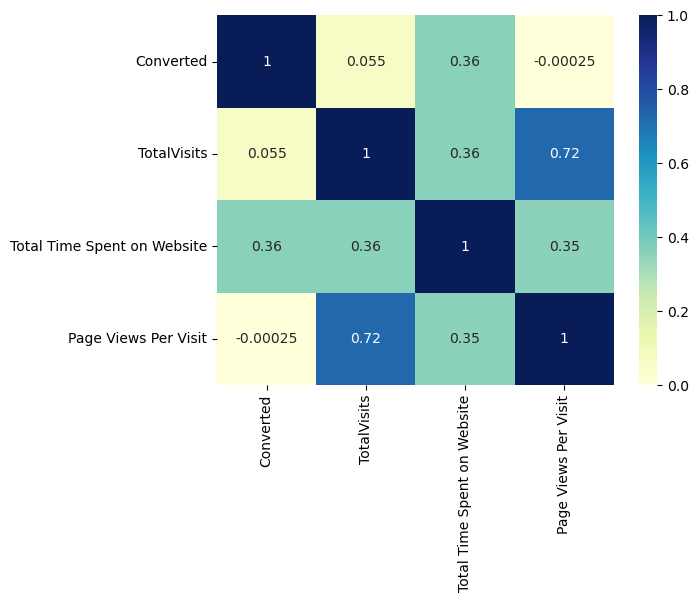

In [79]:
sns.heatmap(data_Corr.corr(), cmap="YlGnBu", annot=True)
plt.show()

1. This shows TotalVisits Column and Page Views Per Visit Column were highly correlated.
2. Compared to all, Total Time Spent on Website is directly related with Converted column.

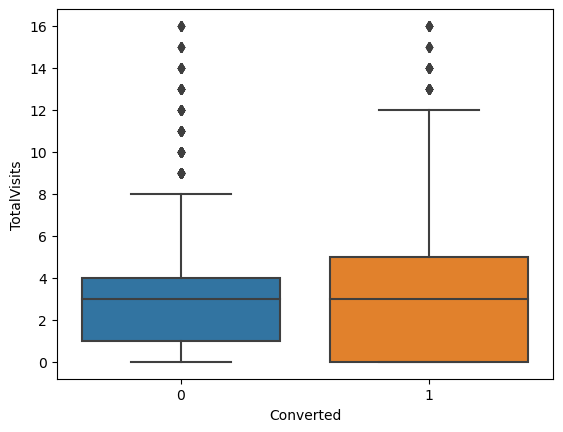

In [80]:
sns.boxplot(x = leadscore['Converted'], y = leadscore['TotalVisits'])
plt.show()

Although median is same for both, but 3rd quartile is higher for Yes as compared with No.
By looking at box plot, TotalVisits converted to Yes is more.

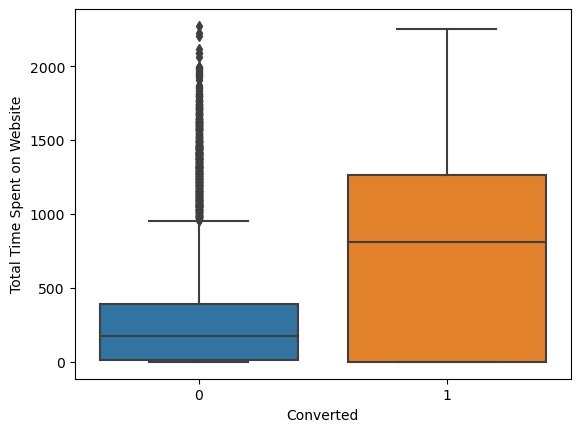

In [81]:
sns.boxplot(x = leadscore['Converted'], y = leadscore['Total Time Spent on Website'])
plt.show()

This clearly shows that 'Total Time Spent on Website' has shown more conversion to Yes as compared to No.

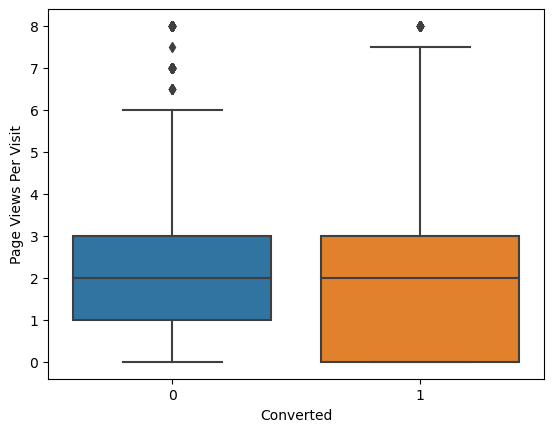

In [82]:
sns.boxplot(x = leadscore['Converted'], y = leadscore['Page Views Per Visit'])
plt.show()

It has almost same median and also 3rd quartile also same. 

In [83]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8863 non-null   object 
 1   Lead Source                                    8863 non-null   object 
 2   Do Not Email                                   8863 non-null   object 
 3   Do Not Call                                    8863 non-null   object 
 4   Converted                                      8863 non-null   int64  
 5   TotalVisits                                    8863 non-null   float64
 6   Total Time Spent on Website                    8863 non-null   int64  
 7   Page Views Per Visit                           8863 non-null   float64
 8   Last Activity                                  8863 non-null   object 
 9   Country                                        8863 

#### Lets Check each categorical column and lets get some observations

#### Column: Lead Origin

In [84]:
leadscore['Lead Origin'].value_counts()

Landing Page Submission    4715
API                        3538
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

#### Lets plot a countplot between 'Lead Origin' column and with target column Converted

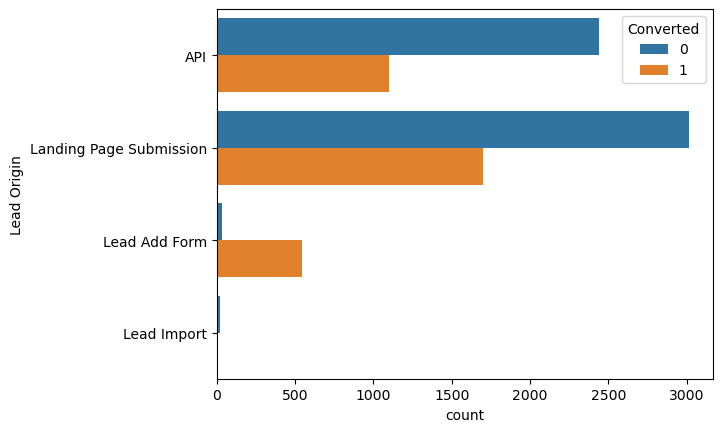

In [85]:
sns.countplot(y = leadscore['Lead Origin'], hue=leadscore['Converted'])
plt.show()

Among all, Landing Page Submission leads to more conversion to Yes as compared with remaining ones.

#### Column: Lead Source

In [86]:
leadscore['Lead Source'].value_counts()

Google               2823
Direct Traffic       2480
Olark Chat           1749
Organic Search       1069
Reference             442
Welingak Website      129
Referral Sites        113
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

<br> Google and google both are same and we can combine these two.
<br> Remaining all (values < 10) will be combined to 'Others'

In [87]:
leadscore['Lead Source'].replace('google','Google', inplace=True)

In [88]:
leadscore['Lead Source'].value_counts()

Google               2828
Direct Traffic       2480
Olark Chat           1749
Organic Search       1069
Reference             442
Welingak Website      129
Referral Sites        113
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [89]:
leadscore['Lead Source'].replace(['bing', 'Click2call', 'Social Media', 'Live Chat',
                                 'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home',
                                 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],'Others', inplace=True)           

In [90]:
leadscore['Lead Source'].value_counts()

Google              2828
Direct Traffic      2480
Olark Chat          1749
Organic Search      1069
Reference            442
Welingak Website     129
Referral Sites       113
Facebook              31
Others                22
Name: Lead Source, dtype: int64

#### Lets plot a countplot between 'Lead Source' column and with target column Converted

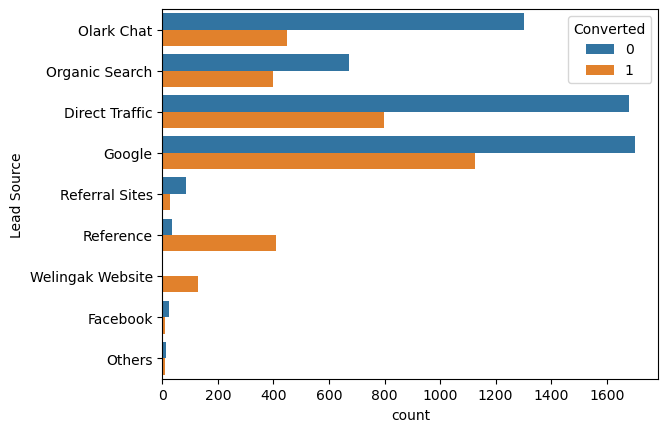

In [91]:
sns.countplot(y = leadscore['Lead Source'], hue=leadscore['Converted'])
plt.show()

This shows google had contributed more conversion to yes as compared to others

#### Column: Do Not Email

In [92]:
leadscore['Do Not Email'].value_counts()

No     8179
Yes     684
Name: Do Not Email, dtype: int64

In [93]:
round(len(leadscore[leadscore['Do Not Email'] == 'No'])/len(leadscore['Do Not Email'])*100,2)

92.28

#### Column: Do Not Call

In [94]:
leadscore['Do Not Call'].value_counts()

No     8861
Yes       2
Name: Do Not Call, dtype: int64

In [95]:
round(len(leadscore[leadscore['Do Not Call'] == 'No'])/len(leadscore['Do Not Call'])*100,2)

99.98

Both these shows customers preferred not to get call and email.

Also we can drop these two columns as more than 90% of data belongs to Converted No

In [96]:
leadscore.drop(['Do Not Email', 'Do Not Call'], axis = 1, inplace=True)

#### Column: Last Activity

In [97]:
leadscore['Last Activity'].value_counts()

Email Opened                    3362
SMS Sent                        2657
Olark Chat Conversation          963
Page Visited on Website          585
Converted to Lead                427
Email Bounced                    309
Email Link Clicked               264
Form Submitted on Website        113
Unreachable                       86
Unsubscribed                      58
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In this one values < 100 will be combined as others.

In [98]:
leadscore['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
                                   'Approached upfront', 'View in browser link Clicked',
                                   'Email Received', 'Email Marked Spam',
                                   'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Others', inplace=True)  

In [99]:
leadscore['Last Activity'].value_counts()

Email Opened                 3362
SMS Sent                     2657
Olark Chat Conversation       963
Page Visited on Website       585
Converted to Lead             427
Email Bounced                 309
Email Link Clicked            264
Others                        183
Form Submitted on Website     113
Name: Last Activity, dtype: int64

#### Lets plot a countplot between 'Last Activity' column and with target column Converted

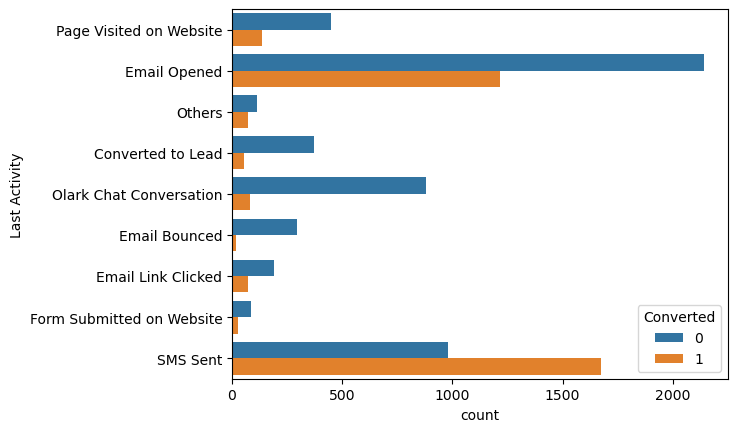

In [100]:
sns.countplot(y = leadscore['Last Activity'], hue=leadscore['Converted'])
plt.show()

This shows Leads which had converted into Yes is by Email and SMS.

#### Column: Country

In [101]:
leadscore['Country'].value_counts()

India                   8584
Others                    89
United States             67
United Arab Emirates      52
Singapore                 23
Saudi Arabia              20
United Kingdom            15
Australia                 13
Name: Country, dtype: int64

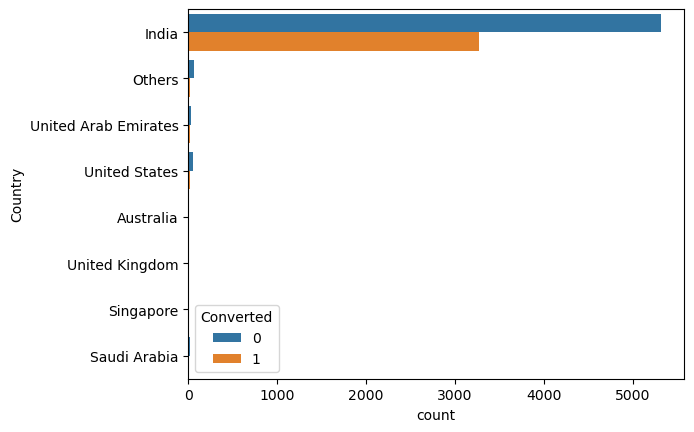

In [102]:
sns.countplot(y = leadscore['Country'], hue=leadscore['Converted'])
plt.show()

This shows majority are from India who had shown interested in course.

In [103]:
round(len(leadscore[leadscore['Country'] == 'India'])/len(leadscore['Country'])*100,2)

96.85

We can drop column Country as more than 90% of data belongs to India

In [104]:
leadscore.drop(['Country'], axis = 1, inplace=True)

#### Column: Specialization

In [105]:
leadscore['Specialization'].value_counts()

Others                               3254
Finance Management                    939
Human Resource Management             808
Marketing Management                  807
Operations Management                 491
Business Administration               388
IT Projects Management                357
Supply Chain Management               333
Banking, Investment And Insurance     319
Media and Advertising                 195
Travel and Tourism                    187
International Business                171
Healthcare Management                 149
E-COMMERCE                            106
Hospitality Management                105
Retail Management                      94
Rural and Agribusiness                 69
E-Business                             54
Services Excellence                    37
Name: Specialization, dtype: int64

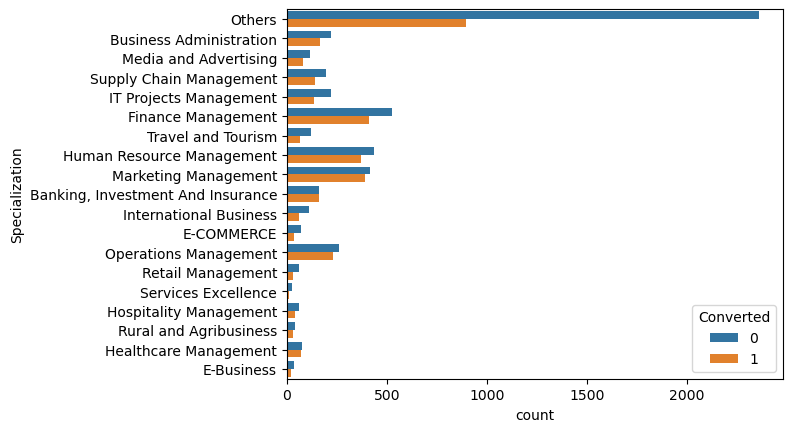

In [106]:
sns.countplot(y = leadscore['Specialization'], hue=leadscore['Converted'])
plt.show()

Finance, Human Resourse and Marketing people are more interested and converted into Yes.

#### Column: What is your current occupation

In [107]:
leadscore['What is your current occupation'].value_counts()

Unemployed              7972
Working Professional     660
Student                  202
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [108]:
round(len(leadscore[leadscore['What is your current occupation'] == 'Unemployed'])/len(leadscore['What is your current occupation'])*100,2)

89.95

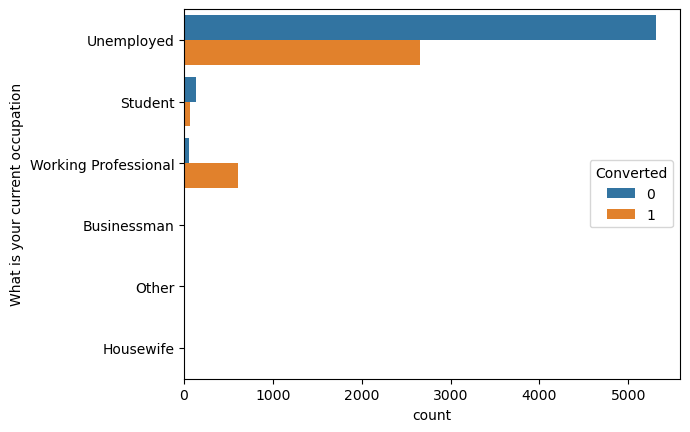

In [109]:
sns.countplot(y = leadscore['What is your current occupation'], hue=leadscore['Converted'])
plt.show()

This shows working professional were more interested and more converted into Yes as compared to Others

Even though Unemployed data almost 90%, But working professional is seems more important. We will not drop this column. 

#### Column: What matters most to you in choosing a course

In [110]:
leadscore['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      8861
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [111]:
round(len(leadscore[leadscore['What matters most to you in choosing a course'] == 'Better Career Prospects'])/len(leadscore['What matters most to you in choosing a course'])*100,2)

99.98

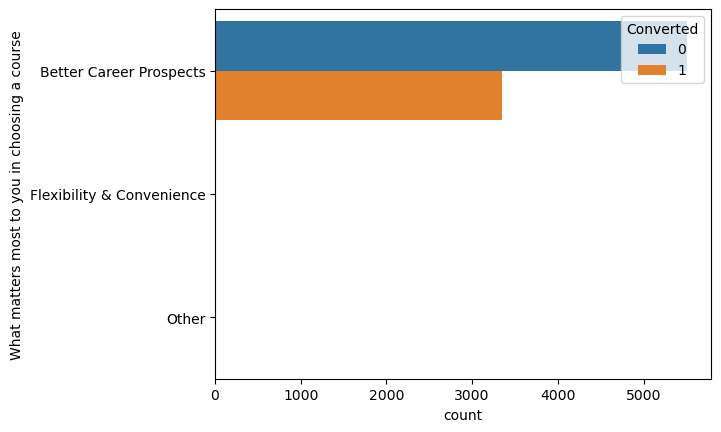

In [112]:
sns.countplot(y = leadscore['What matters most to you in choosing a course'], hue=leadscore['Converted'])
plt.show()

 This shows mostly all converted into yes were want to have better career prospects.

Almost whole data belongs to 'Better Career Prospects'. It is better to be dropped.

In [113]:
leadscore.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

#### Column: Search

In [114]:
leadscore['Search'].value_counts()

No     8850
Yes      13
Name: Search, dtype: int64

In [115]:
round(len(leadscore[leadscore['Search'] == 'No'])/len(leadscore['Search'])*100,2)

99.85

Almost whole data belongs to 'Search' 'No' option. It is better to be dropped.

In [116]:
leadscore.drop(['Search'], axis = 1, inplace=True)

#### Column: Magazine

In [117]:
leadscore['Magazine'].value_counts()

No    8863
Name: Magazine, dtype: int64

Whole data belongs to 'Magazine' 'No' option. It is better to be dropped.

In [118]:
leadscore.drop(['Magazine'], axis = 1, inplace=True)

#### Column: Newspaper Article

In [119]:
leadscore['Newspaper Article'].value_counts()

No    8863
Name: Newspaper Article, dtype: int64

Whole data belongs to 'Newspaper Article' 'No' option. It is better to be dropped.

In [120]:
leadscore.drop(['Newspaper Article'], axis = 1, inplace=True)

#### Column: X Education Forums

In [121]:
leadscore['X Education Forums'].value_counts()

No    8863
Name: X Education Forums, dtype: int64

Whole data belongs to 'X Education Forums' 'No' option. It is better to be dropped.

In [122]:
leadscore.drop(['X Education Forums'], axis = 1, inplace=True)

#### Column: Newspaper

In [123]:
leadscore['Newspaper'].value_counts()

No     8862
Yes       1
Name: Newspaper, dtype: int64

Whole data belongs to 'Newspaper' 'No' option. It is better to be dropped.

In [124]:
leadscore.drop(['Newspaper'], axis = 1, inplace=True)

#### Column: Digital Advertisement

In [125]:
leadscore['Digital Advertisement'].value_counts()

No     8861
Yes       2
Name: Digital Advertisement, dtype: int64

Whole data belongs to 'Digital Advertisement' 'No' option. It is better to be dropped.

In [126]:
leadscore.drop(['Digital Advertisement'], axis = 1, inplace=True)

#### Column: Through Recommendations

In [127]:
leadscore['Through Recommendations'].value_counts()

No     8857
Yes       6
Name: Through Recommendations, dtype: int64

Whole data belongs to 'Through Recommendations' 'No' option. It is better to be dropped.

In [128]:
leadscore.drop(['Through Recommendations'], axis = 1, inplace=True)

#### Column: Receive More Updates About Our Courses

In [129]:
leadscore['Receive More Updates About Our Courses'].value_counts()

No    8863
Name: Receive More Updates About Our Courses, dtype: int64

Whole data belongs to 'Receive More Updates About Our Courses' 'No' option. It is better to be dropped.

In [130]:
leadscore.drop(['Receive More Updates About Our Courses'], axis = 1, inplace=True)

#### Column: Tags 

In [131]:
leadscore['Tags'].value_counts()

Others                                               3263
Will revert after reading the email                  1969
Ringing                                              1144
Interested in other courses                           502
Already a student                                     460
Closed by Horizzon                                    289
switched off                                          235
Busy                                                  181
Lost to EINS                                          167
Not doing further education                           136
Interested  in full time MBA                          115
Graduation in progress                                109
invalid number                                         80
Diploma holder (Not Eligible)                          63
wrong number given                                     44
opp hangup                                             33
number not provided                                    25
in touch with 

Let columns which have data < 100, will combined with others.

In [132]:
leadscore['Tags'].replace(['invalid number', 'Diploma holder (Not Eligible)'],'Others', inplace=True)

In [133]:
leadscore['Tags'].replace(['wrong number given', 'opp hangup', 'number not provided',
                          'in touch with EINS', 'Lost to Others', 'Still Thinking',
                          'In confusion whether part time or DLP', 'Interested in Next batch',
                          'Want to take admission but has financial problems', 'Lateral student',
                          'Shall take in the next coming month', 'University not recognized',
                          'Recognition issue (DEC approval)'],'Others', inplace=True)

In [134]:
leadscore['Tags'].value_counts()

Others                                 3556
Will revert after reading the email    1969
Ringing                                1144
Interested in other courses             502
Already a student                       460
Closed by Horizzon                      289
switched off                            235
Busy                                    181
Lost to EINS                            167
Not doing further education             136
Interested  in full time MBA            115
Graduation in progress                  109
Name: Tags, dtype: int64

#### Lets plot a countplot between 'Tags' column and with target column Converted

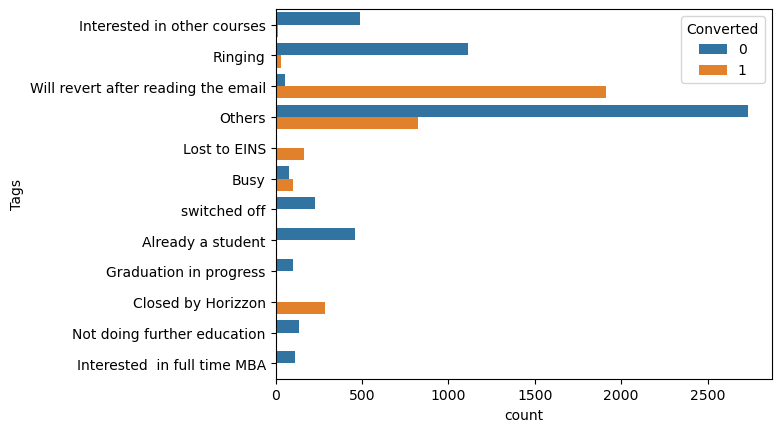

In [135]:
sns.countplot(y = leadscore['Tags'], hue=leadscore['Converted'])
plt.show()

It shows that customer will revert after email reading is more and converted into Yes.

#### Column: Update me on Supply Chain Content  

In [136]:
leadscore['Update me on Supply Chain Content'].value_counts()

No    8863
Name: Update me on Supply Chain Content, dtype: int64

Whole data belongs to 'Update me on Supply Chain Content' 'No' option. It is better to be dropped.

In [137]:
leadscore.drop(['Update me on Supply Chain Content'], axis = 1, inplace=True)

#### Column: Get updates on DM Content

In [138]:
leadscore['Get updates on DM Content'].value_counts()

No    8863
Name: Get updates on DM Content, dtype: int64

Whole data belongs to 'Get updates on DM Content' 'No' option. It is better to be dropped.

In [139]:
leadscore.drop(['Get updates on DM Content'], axis = 1, inplace=True)

#### Column: City    

In [140]:
leadscore['City'].value_counts()

Mumbai                         6623
Thane & Outskirts               717
Other Cities                    662
Other Cities of Maharashtra     430
Other Metro Cities              361
Tier II Cities                   70
Name: City, dtype: int64

In [141]:
round(len(leadscore[leadscore['City'] == 'Mumbai'])/len(leadscore['City'])*100,2)

74.73

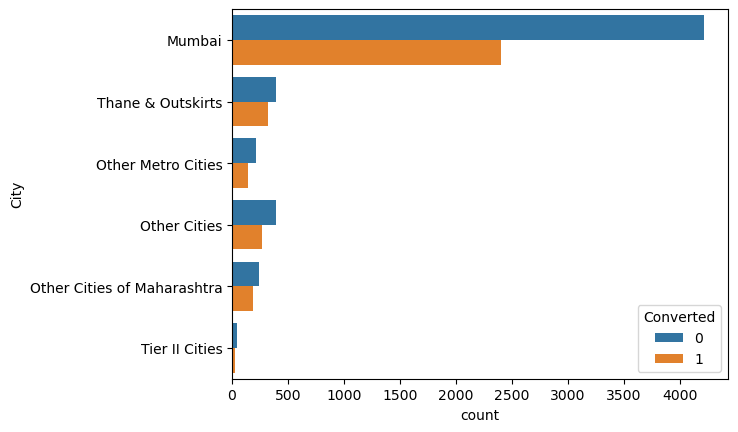

In [142]:
sns.countplot(y = leadscore['City'], hue=leadscore['Converted'])
plt.show()

Majority are from Mumbai which gets converted into Yes.

#### Column: I agree to pay the amount through cheque

In [143]:
leadscore['I agree to pay the amount through cheque'].value_counts()

No    8863
Name: I agree to pay the amount through cheque, dtype: int64

Whole data belongs to 'I agree to pay the amount through cheque' 'No' option. It is better to be dropped.

In [144]:
leadscore.drop(['I agree to pay the amount through cheque'], axis = 1, inplace=True)

#### Column: A free copy of Mastering The Interview  

In [145]:
leadscore['A free copy of Mastering The Interview'].value_counts()

No     6103
Yes    2760
Name: A free copy of Mastering The Interview, dtype: int64

Only some customers preferred to get a free copy of 'A free copy of Mastering The Interview'

#### Column: Last Notable Activity   

In [146]:
leadscore['Last Notable Activity'].value_counts()

Modified                        3204
Email Opened                    2766
SMS Sent                        2106
Page Visited on Website          281
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      44
Unreachable                       31
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

Values < 100 will be combined and marked as 'Others'. This is to get easy understanding.

In [147]:
leadscore['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                            'Had a Phone Conversation', 'Email Marked Spam','Approached upfront',
                                            'Resubscribed to emails', 'View in browser link Clicked',
                                            'Form Submitted on Website','Email Received'],'Others', inplace=True)

In [148]:
leadscore['Last Notable Activity'].value_counts()         

Modified                   3204
Email Opened               2766
SMS Sent                   2106
Page Visited on Website     281
Olark Chat Conversation     182
Email Link Clicked          170
Others                      154
Name: Last Notable Activity, dtype: int64

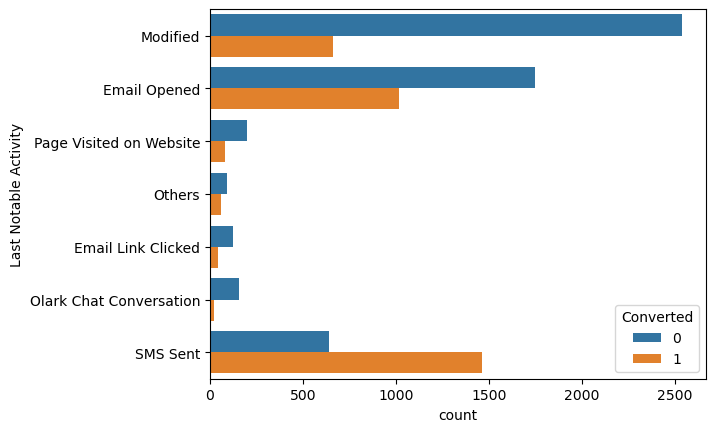

In [149]:
sns.countplot(y = leadscore['Last Notable Activity'], hue=leadscore['Converted'])
plt.show()

It shows majority are interested by SMS Sent option.

Finally we have columns after data cleaning as shown below:

In [150]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8863 non-null   object 
 1   Lead Source                             8863 non-null   object 
 2   Converted                               8863 non-null   int64  
 3   TotalVisits                             8863 non-null   float64
 4   Total Time Spent on Website             8863 non-null   int64  
 5   Page Views Per Visit                    8863 non-null   float64
 6   Last Activity                           8863 non-null   object 
 7   Specialization                          8863 non-null   object 
 8   What is your current occupation         8863 non-null   object 
 9   Tags                                    8863 non-null   object 
 10  City                                    8863 non-null   obje

### 3. Data Preparation

#### Lets observe data carefully again.

In [151]:
leadscore.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### Only one column 'A free copy of Mastering The Interview' has values of Yes/No. We will Convert these into binary variables (Yes/No) to 0/1

In [152]:
leadscore['A free copy of Mastering The Interview'] = leadscore['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'Yes' else 0)

In [153]:
leadscore.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


For verification if All values in 'A free copy of Mastering The Interview' is changed into 1/0.

In [154]:
leadscore['A free copy of Mastering The Interview'].value_counts()

0    6103
1    2760
Name: A free copy of Mastering The Interview, dtype: int64

#### Creating Dummy variables for all categorical column

#### Column: Lead Origin

In [155]:
# Creating dummy variable for column Lead Origin
lo = pd.get_dummies(leadscore['Lead Origin'], prefix = 'Lead Origin', drop_first= True, dtype = int)
lo.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [156]:
leadscore = pd.concat([leadscore, lo], axis=1)

In [157]:
leadscore.drop('Lead Origin', axis = 1, inplace = True)

In [158]:
leadscore.head()

,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0
1,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0
2,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0
3,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0
4,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0


#### Column: Lead Source

In [159]:
leadscore['Lead Source'].value_counts()

Google              2828
Direct Traffic      2480
Olark Chat          1749
Organic Search      1069
Reference            442
Welingak Website     129
Referral Sites       113
Facebook              31
Others                22
Name: Lead Source, dtype: int64

In [160]:
# Creating dummy variable for column Lead Source
ls = pd.get_dummies(leadscore['Lead Source'], prefix = 'Lead Source', dtype = int)
ls.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


We will drop Lead Source_Others column as its value is very less and also we made to combine some particular data.

In [161]:
ls1 = ls.drop('Lead Source_Others', axis = 1)

In [162]:
ls1.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [163]:
leadscore = pd.concat([leadscore, ls], axis=1)

In [164]:
leadscore.drop('Lead Source', axis = 1, inplace = True)

In [165]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0


#### Column: Last Activity

In [166]:
leadscore['Last Activity'].value_counts()

Email Opened                 3362
SMS Sent                     2657
Olark Chat Conversation       963
Page Visited on Website       585
Converted to Lead             427
Email Bounced                 309
Email Link Clicked            264
Others                        183
Form Submitted on Website     113
Name: Last Activity, dtype: int64

In [167]:
# Creating dummy variable for column Last Activity
la = pd.get_dummies(leadscore['Last Activity'], prefix = 'Last Activity', dtype = int)
la.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0


We will drop Last Activity_Others column as we made to combine some particular data.

In [168]:
la1 = la.drop('Last Activity_Others', axis = 1)

In [169]:
la1.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [170]:
leadscore = pd.concat([leadscore, la1], axis = 1)

In [171]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [172]:
leadscore.drop('Last Activity', axis = 1, inplace=True)

In [173]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0.0,0,0.0,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Column: Specialization

In [174]:
leadscore['Specialization'].value_counts()

Others                               3254
Finance Management                    939
Human Resource Management             808
Marketing Management                  807
Operations Management                 491
Business Administration               388
IT Projects Management                357
Supply Chain Management               333
Banking, Investment And Insurance     319
Media and Advertising                 195
Travel and Tourism                    187
International Business                171
Healthcare Management                 149
E-COMMERCE                            106
Hospitality Management                105
Retail Management                      94
Rural and Agribusiness                 69
E-Business                             54
Services Excellence                    37
Name: Specialization, dtype: int64

#### We can combine management courses as it was seen later that while during Recursive feature elimination (RFE) some specilazations are dropped. Its better to combine all management courses.

#### Similarly We can combine business related courses also as Business

In [175]:
leadscore['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management',
                                     'Operations Management','Healthcare Management', 'IT Projects Management',
                                     'Supply Chain Management', 'Hospitality Management',
                                     'Retail Management'],'Management', inplace=True)

In [176]:
leadscore['Specialization'].replace(['Business Administration', 'International Business', 
                                     'Rural and Agribusiness', 'E-Business' ],'Business', inplace=True)

In [177]:
leadscore['Specialization'].value_counts()

Management                           4083
Others                               3254
Business                              682
Banking, Investment And Insurance     319
Media and Advertising                 195
Travel and Tourism                    187
E-COMMERCE                            106
Services Excellence                    37
Name: Specialization, dtype: int64

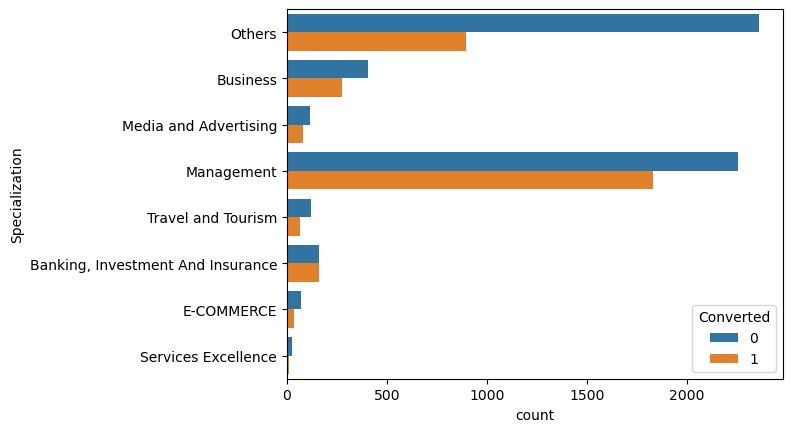

In [178]:
sns.countplot(y = leadscore['Specialization'], hue=leadscore['Converted'])
plt.show()

In [179]:
# Creating dummy variable for column Specialization
Specialize = pd.get_dummies(leadscore['Specialization'], prefix = 'Specialization', dtype = int)
Specialize.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0


We will drop column 'Specialization_Others' as it was made during data cleaning.

In [180]:
Specialize1 = Specialize.drop('Specialization_Others', axis = 1)

In [181]:
leadscore = pd.concat([leadscore, Specialize1], axis = 1)

In [182]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Business,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
leadscore.drop('Specialization', axis = 1, inplace= True)

In [184]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Column: What is your current occupation

In [185]:
leadscore['What is your current occupation'].value_counts()

Unemployed              7972
Working Professional     660
Student                  202
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [186]:
# Creating dummy variable for column 'What is your current occupation'
co = pd.get_dummies(leadscore['What is your current occupation'], prefix='Current_Occupation?', dtype = int)
co.head()

,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Other,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


We will drop column 'Current_Occupation?_Other' as remaining all other are specified professions.

In [187]:
co1 = co.drop('Current_Occupation?_Other', axis = 1)

In [188]:
co1.head()

,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [189]:
leadscore = pd.concat([leadscore, co1], axis = 1)

In [190]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional
0,0,0.0,0,0.0,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [191]:
leadscore.drop('What is your current occupation', axis=1, inplace=True)

In [192]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional
0,0,0.0,0,0.0,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Column: Tags

In [193]:
leadscore['Tags'].value_counts()

Others                                 3556
Will revert after reading the email    1969
Ringing                                1144
Interested in other courses             502
Already a student                       460
Closed by Horizzon                      289
switched off                            235
Busy                                    181
Lost to EINS                            167
Not doing further education             136
Interested  in full time MBA            115
Graduation in progress                  109
Name: Tags, dtype: int64

In [194]:
# Creating dummy variable for column 'Tags'
ta = pd.get_dummies(leadscore['Tags'], prefix='Tags', dtype = int)
ta.head()

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0


We will drop column 'Tags_Others' as it was missing data/ Select data.

In [195]:
ta1 = ta.drop('Tags_Others', axis=1)

In [196]:
ta1.head()

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [197]:
leadscore = pd.concat([leadscore, ta1], axis = 1)

In [198]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,Ringing,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [199]:
leadscore.drop('Tags', axis = 1, inplace=True)

In [200]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


#### Column: City

In [201]:
leadscore['City'].value_counts()

Mumbai                         6623
Thane & Outskirts               717
Other Cities                    662
Other Cities of Maharashtra     430
Other Metro Cities              361
Tier II Cities                   70
Name: City, dtype: int64

In [202]:
# Creating dummy variable for column 'City'
ci = pd.get_dummies(leadscore['City'], prefix='City', dtype = int)
ci.head()

,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


We will drop column 'City_Tier II Cities' as it consists of least data

In [203]:
ci1 = ci.drop('City_Tier II Cities', axis=1)

In [204]:
ci1.head()

,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [205]:
leadscore = pd.concat([leadscore, ci1], axis = 1)

In [206]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0.0,0,0.0,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,Mumbai,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [207]:
leadscore.drop('City', axis = 1, inplace=True)

In [208]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0.0,0,0.0,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


#### Column: A free copy of Mastering The Interview

In [209]:
# Creating dummy variable for column 'City'
free_copy = pd.get_dummies(leadscore['A free copy of Mastering The Interview'], prefix='Free_Mastering_Copy', dtype = int)
free_copy.head()

,Free_Mastering_Copy_0,Free_Mastering_Copy_1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


We will drop column 'Free_Mastering_Copy_0' as Free_Mastering_Copy_1 will take care of that values also

In [210]:
free_copy1 = free_copy.drop('Free_Mastering_Copy_0', axis=1)

In [211]:
free_copy1.head()

,Free_Mastering_Copy_1
0,0
1,0
2,1
3,0
4,0


In [212]:
leadscore = pd.concat([leadscore, free_copy1], axis = 1)

In [213]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Free_Mastering_Copy_1
0,0,0.0,0,0.0,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,1.0,305,1.0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.0,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [214]:
leadscore.drop('A free copy of Mastering The Interview', axis = 1, inplace=True)

In [215]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Free_Mastering_Copy_1
0,0,0.0,0,0.0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,1.0,305,1.0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


#### Column: Last Notable Activity

In [216]:
leadscore['Last Notable Activity'].value_counts()

Modified                   3204
Email Opened               2766
SMS Sent                   2106
Page Visited on Website     281
Olark Chat Conversation     182
Email Link Clicked          170
Others                      154
Name: Last Notable Activity, dtype: int64

In [217]:
# Creating dummy variable for column 'Last Notable Activity'
lna = pd.get_dummies(leadscore['Last Notable Activity'], prefix='Last_Notable_Activity', dtype = int)
lna.head()

,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


We will drop column 'Last_Activity_Others' as it was made by combined by many other items.

In [218]:
lna1 = lna.drop('Last_Notable_Activity_Others', axis=1)

In [219]:
lna1.head()

,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [220]:
leadscore = pd.concat([leadscore, lna1], axis = 1)

In [221]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Free_Mastering_Copy_1,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0.0,0,0.0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [222]:
leadscore.drop('Last Notable Activity', axis = 1, inplace=True)

In [223]:
leadscore.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Free_Mastering_Copy_1,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [224]:
leadscore.shape

(8863, 59)

#### Finally it consists of 8863 rows and 70 columns of data

#### Checking for Missing Values finally if any

In [225]:
leadscore.isnull().sum()

Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Lead Origin_Landing Page Submission                 0
Lead Origin_Lead Add Form                           0
Lead Origin_Lead Import                             0
Lead Source_Direct Traffic                          0
Lead Source_Facebook                                0
Lead Source_Google                                  0
Lead Source_Olark Chat                              0
Lead Source_Organic Search                          0
Lead Source_Others                                  0
Lead Source_Reference                               0
Lead Source_Referral Sites                          0
Lead Source_Welingak Website                        0
Last Activity_Converted to Lead                     0
Last Activity_Email Bounced                         0
Last Activity_Email Link Cli

#### This shows no missing data

In [226]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         8863 non-null   int64  
 1   TotalVisits                                       8863 non-null   float64
 2   Total Time Spent on Website                       8863 non-null   int64  
 3   Page Views Per Visit                              8863 non-null   float64
 4   Lead Origin_Landing Page Submission               8863 non-null   int32  
 5   Lead Origin_Lead Add Form                         8863 non-null   int32  
 6   Lead Origin_Lead Import                           8863 non-null   int32  
 7   Lead Source_Direct Traffic                        8863 non-null   int32  
 8   Lead Source_Facebook                              8863 non-null   int32  
 9   Lead Source_Google 

#### This shows everything is in integer or float format.

### Step4 : Train-Test Split

In [227]:
import sklearn
from sklearn.model_selection import train_test_split

In [228]:
# Put feature variable to X
X = leadscore.drop('Converted', axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Free_Mastering_Copy_1,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [229]:
# Put target variable to y
y = leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [230]:
# Now we will divide the whole data into train and test data set in ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [231]:
X_train.shape

(6204, 58)

In [232]:
leadscore.shape

(8863, 59)

In [233]:
8863*0.70

6204.099999999999

It had divided the data correctly into train and test

### Step 5: Feature Scaling

In [234]:
from sklearn.preprocessing import StandardScaler

#### We will do scaling only on numerical variables and not on categorical binary columns

In [235]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Free_Mastering_Copy_1,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
5425,-0.024078,-0.617232,0.421959,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
8586,0.335002,-0.241036,0.967428,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4631,0.694082,-0.224520,0.149225,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4464,-0.024078,-0.536488,-0.396244,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2058,1.412241,-0.602552,-0.450791,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [236]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.204000e+03,6.204000e+03,6.204000e+03
mean,-1.836055e-17,3.698954e-17,2.337123e-16
std,1.000081e+00,1.000081e+00,1.000081e+00
min,-1.101316e+00,-8.796526e-01,-1.214447e+00
25%,-7.422366e-01,-8.704770e-01,-6.689781e-01
50%,-2.407754e-02,-4.401447e-01,-1.235094e-01
75%,3.350020e-01,7.852472e-01,4.219592e-01
max,4.643956e+00,3.205293e+00,3.149302e+00


#### We will check the lead conversion rate.

In [237]:
lead_convert = round(sum(leadscore['Converted'])/len(leadscore['Converted'])*100,2)
lead_convert

37.81

We have almost 38% conversion rate i.e. hotleads.

### Checking the Correlation Matrix Again

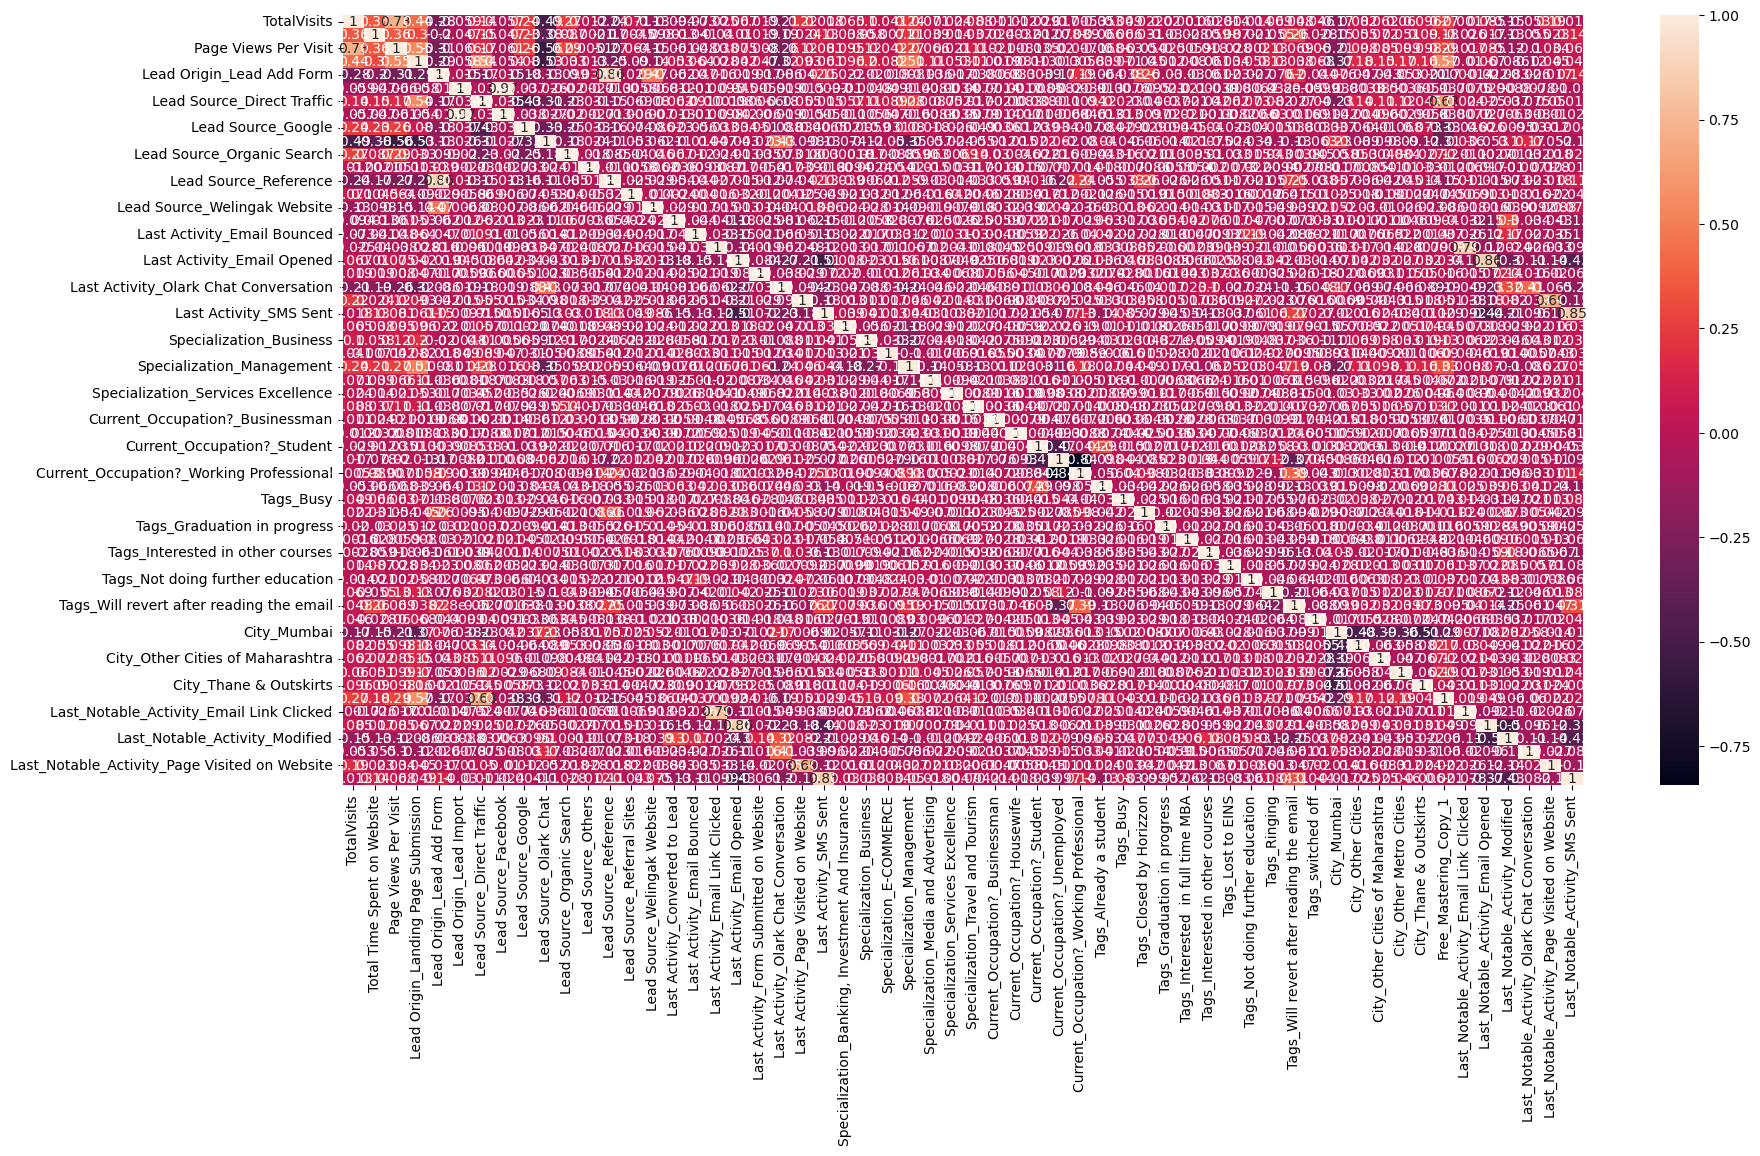

In [238]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

We canot observe anything for above heat map correlation as data given is huge. Better is apply directly RFE technique.

### Step 6: Feature Selection Using RFE

In [239]:
# first we need to import RFE and logistic regression in our data
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [240]:
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [241]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False,  True])

In [242]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 32),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Page Visited on Website', False, 19),
 ('Last Activity_SMS Sent', True, 1),
 ('Sp

In [243]:
col = X_train.columns[rfe.support_]

In [244]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Current_Occupation?_Working Professional', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_SMS Sent'],
      dtype='object')

In [245]:
# Columns which are not included in list
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business', 'Specialization_E-COMMERCE',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Current_Occupation?_Businessman',
       'Current_Occupation?_Housewife', 'Current_Occupation?_Student',
       'Current_Occupation?_Unemployed

### Step 7: Model Building

In [246]:
import statsmodels.api as sm

#### As Our target variable Converted is consists of 1/0 i.e Binomial Logistic Regression need to apply.

In [247]:
X_train_1 = X_train[col]

#### Model 1

In [248]:
X_train_sm = sm.add_constant(X_train_1)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6183
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1165.5
Date:                Tue, 24 Jan 2023   Deviance:                       2331.0
Time:                        18:58:33   Pearson chi2:                 1.13e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6132
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

####  p - values for variables > 0.050, these are not significant
Max p value is for Tags_Interested  in full time MBA, as p = 0.057

In [249]:
# Dropping Tags_Interested in full time MBA column
X2 = X_train_1.drop('Tags_Interested  in full time MBA', axis = 1)

#### Model 2

In [250]:
X_train_sm2 = sm.add_constant(X2)
logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6184
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1168.2
Date:                Tue, 24 Jan 2023   Deviance:                       2336.3
Time:                        18:58:33   Pearson chi2:                 1.15e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6128
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Now all p-values are < 0.050.
Lets see their VIF to check multi-collinearity

#### VIF

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [252]:
# Create a dataframe as vif which contains all feature variables (All X_train variable)
# and their respective ViFs
vif = pd.DataFrame()
vif['features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
18,Last_Notable_Activity_SMS Sent,6.16
5,Last Activity_SMS Sent,5.94
1,Lead Origin_Landing Page Submission,2.19
2,Lead Origin_Lead Add Form,2.01
13,Tags_Will revert after reading the email,2.01
16,Last_Notable_Activity_Modified,1.98
3,Lead Source_Olark Chat,1.62
0,Total Time Spent on Website,1.46
4,Lead Source_Welingak Website,1.37
6,Current_Occupation?_Working Professional,1.33


#### As ViF for variable 'Last_Notable_Activity_SMS Sent' > 5. We need to drop and check the model

In [253]:
# Dropping Last_Notable_Activity_SMS Sent column
X3 = X2.drop('Last_Notable_Activity_SMS Sent', axis = 1)

#### Model 3

In [254]:
X_train_sm3 = sm.add_constant(X3)
logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6185
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1173.4
Date:                Tue, 24 Jan 2023   Deviance:                       2346.7
Time:                        18:58:33   Pearson chi2:                 1.21e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6122
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Now again p-value is showing value > 0.050.
We need to drop Lead Origin_Lead Add Form column

In [255]:
# Dropping Lead Origin_Lead Add Form column
X4 = X3.drop('Lead Origin_Lead Add Form', axis = 1)

In [256]:
X4.columns

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Current_Occupation?_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

#### Model 4

In [257]:
X_train_sm4 = sm.add_constant(X4)
logm4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6186
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1175.3
Date:                Tue, 24 Jan 2023   Deviance:                       2350.6
Time:                        18:58:34   Pearson chi2:                 1.21e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6119
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Now it is showing correctly as all p-values are < 0.050.
#### Lets check VIF again

In [258]:
# Create a dataframe as vif which contains all feature variables (All X_train variable)
# and their respective ViFs
vif = pd.DataFrame()
vif['features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,Lead Origin_Landing Page Submission,2.02
12,Tags_Will revert after reading the email,1.75
15,Last_Notable_Activity_Modified,1.59
4,Last Activity_SMS Sent,1.56
2,Lead Source_Olark Chat,1.48
5,Current_Occupation?_Working Professional,1.32
0,Total Time Spent on Website,1.31
11,Tags_Ringing,1.26
8,Tags_Interested in other courses,1.12
6,Tags_Already a student,1.11


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Step 8: Prediction for accuracy

In [259]:
y_train_pred = logm4.predict(X_train_sm4)
y_train_pred[:10]

5425    0.992961
8586    0.013739
4631    0.002731
4464    0.038313
2058    0.055392
1719    0.095595
2286    0.996176
1433    0.144820
5550    0.043067
8333    0.139513
dtype: float64

In [260]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99296116, 0.01373887, 0.0027306 , 0.03831253, 0.05539201,
       0.09559468, 0.99617564, 0.1448199 , 0.04306706, 0.13951316])

#### Creating a dataframe with the actual Converted and the predicted probabilities

In [261]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID
0,1,0.992961,5425
1,0,0.013739,8586
2,0,0.002731,4631
3,0,0.038313,4464
4,0,0.055392,2058


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [262]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(150)

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.992961,5425,1
1,0,0.013739,8586,0
2,0,0.002731,4631,0
3,0,0.038313,4464,0
4,0,0.055392,2058,0
5,0,0.095595,1719,0
6,1,0.996176,2286,1
7,1,0.144820,1433,0
8,0,0.043067,5550,0
9,0,0.139513,8333,0


In [263]:
from sklearn import metrics

In [264]:
# Confusion Metrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3714  149]
 [ 278 2063]]


In [265]:
# Predicted/Actual    not_Converted    Converted
# not_Converted               3714       149
# Converted                   278        2063  

    #                         TN          FP
    #                         FN          TP

In [266]:
# Lets check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9311734364925854


In [267]:
TN = confusion[0,0]     #True Negative
FP = confusion[0,1]     #False Positive
FN = confusion[1,0]     #False Negative
TP = confusion[1,1]     #True Positive

In [268]:
# Let's see the sensitivity of our logistic regression model
TP/(FN + TP)

0.881247330200769

In [269]:
# Let us calculate specificity
TN/(TN + FP)

0.9614289412373803

In [270]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/(FP + TN)

0.03857105876261972

In [271]:
# positive predictive value 
TP/(TP + FP)

0.9326401446654611

In [272]:
# Negative predictive value
TN/(TN + FN)

0.9303607214428857

 ### Step 9: Plotting ROC Curve

In [273]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')           # line from (0,0) to (1,1) represented by --- and k represents black color
    plt.xlim([0.0, 1.0])                    # x limits 0 to 1
    plt.ylim([0.0, 1.05])                   # y limits 0 to 1.05
    plt.xlabel('False Positive Rate or [1- Sepcificity]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [274]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate= False)

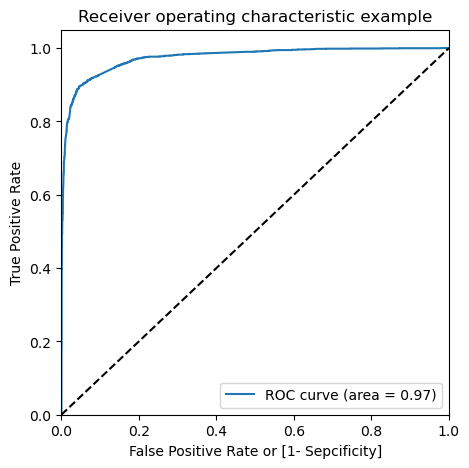

In [275]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [276]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.992961,5425,1,1,1,1,1,1,1,1,1,1,1
1,0,0.013739,8586,0,1,0,0,0,0,0,0,0,0,0
2,0,0.002731,4631,0,1,0,0,0,0,0,0,0,0,0
3,0,0.038313,4464,0,1,0,0,0,0,0,0,0,0,0
4,0,0.055392,2058,0,1,0,0,0,0,0,0,0,0,0


In [277]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.859284  0.974370  0.789542
0.2   0.2  0.892972  0.949594  0.858659
0.3   0.3  0.922792  0.913285  0.928553
0.4   0.4  0.929400  0.898334  0.948227
0.5   0.5  0.931173  0.881247  0.961429
0.6   0.6  0.927789  0.859035  0.969454
0.7   0.7  0.915538  0.807774  0.980844
0.8   0.8  0.908769  0.780863  0.986280
0.9   0.9  0.890393  0.724050  0.991199


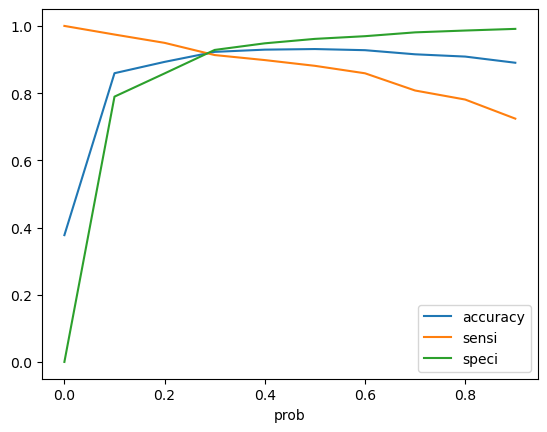

In [278]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x ='prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

#### From the curve above, 0.30 is the optimum point to take it as a cutoff probability

In [279]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.992961,5425,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.013739,8586,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.002731,4631,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.038313,4464,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.055392,2058,0,1,0,0,0,0,0,0,0,0,0,0


In [280]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9227917472598324

In [281]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3587,  276],
       [ 203, 2138]], dtype=int64)

In [282]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [283]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.9132849209739428

In [284]:
# Let us calculate specificity
TN/(TN+FP)

0.9285529381309863

In [285]:
# Calculate false postive rate - predicting converted when customer does not  converted
FP/(FP+TN)

0.07144706186901371

In [286]:
# Positive predictive value 
TP/(TP+FP)

0.8856669428334715

In [287]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9464379947229552


In [288]:
# Precision
print (TP / float(TP+ FP))

0.8856669428334715


In [289]:
# Recall
print (TP / float(TP+ FN))

0.9132849209739428


#### Precision and recall tradeoff

In [290]:
from sklearn.metrics import precision_recall_curve

In [291]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    0
 6202    0
 6203    0
 Name: Converted, Length: 6204, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    1
 6202    0
 6203    0
 Name: predicted, Length: 6204, dtype: int64)

In [292]:
p, r, prob = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

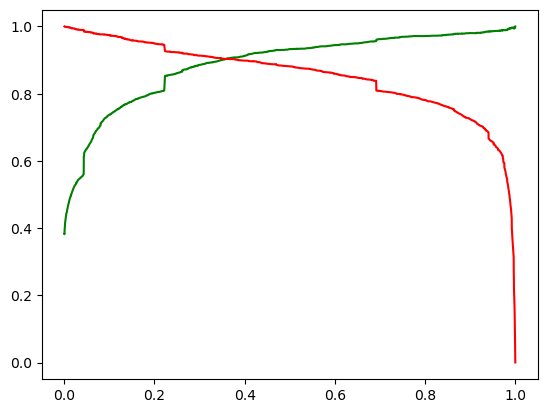

In [293]:
plt.plot(prob, p[:-1], 'g-')
plt.plot(prob, r[:-1], 'r-')
plt.show()

From the curve above, almost 0.38 is the optimum point to take it as a cutoff probability.

### Observation on Train Model: 
1. Our Trained model is seems to be good as our ROC curve's value is 0.97 (It means it had covered almost 97% of graph area). I think this is very good.
2. Accuracy :   92.27%
3. Specificity: 92.85%
4. Sensitivity: 91.33%

### Step 11: Making predictions on the test set

In [294]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business,Specialization_E-COMMERCE,Specialization_Management,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation?_Businessman,Current_Occupation?_Housewife,Current_Occupation?_Student,Current_Occupation?_Unemployed,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Free_Mastering_Copy_1,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
8788,1.053161,1.647288,2.058365,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7813,-0.024078,-0.402525,0.421959,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2403,3.925797,1.733538,0.312865,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
7243,0.694082,1.203193,0.149225,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5363,0.335002,2.067527,0.967428,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


#### After doing Model 4, finally we have below are the variables.


In [295]:
col = X4.columns

In [296]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
8788,1.647288,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7813,-0.402525,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2403,1.733538,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7243,1.203193,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5363,2.067527,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [297]:
#Adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Current_Occupation?_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
8788,1.0,1.647288,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7813,1.0,-0.402525,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2403,1.0,1.733538,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7243,1.0,1.203193,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5363,1.0,2.067527,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [298]:
# Making Predictions on test model
y_test_pred = logm4.predict(X_test_sm)

In [299]:
y_test_pred[:10]

8788    0.150822
7813    0.011480
2403    0.998893
7243    0.999722
5363    0.999240
3918    0.310011
3345    0.221601
917     0.116919
7732    0.116280
1702    0.048671
dtype: float64

In [300]:
# Converting y_test_pred to a dataframe which is an array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.15082236, 0.01147988, 0.99889297, 0.9997224 , 0.99923983,
       0.31001136, 0.22160054, 0.11691931, 0.11628049, 0.04867108])

In [301]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.150822,8788
1,0,0.011480,7813
2,1,0.998893,2403
3,1,0.999722,7243
4,1,0.999240,5363


with 0.3 as cutoff taken from sensivity - specificivity

In [302]:
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x>0.3 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.150822,8788,0
1,0,0.011480,7813,0
2,1,0.998893,2403,1
3,1,0.999722,7243,1
4,1,0.999240,5363,1


#### Test_Confusion matrix

In [303]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
print(confusion_test)

[[1511  138]
 [  95  915]]


In [304]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [305]:
#Overall accuracy
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.9123730725836781


In [306]:
# Let's see the sensitivity of our logistic regression test model
TP / float(TP+FN)

0.905940594059406

In [307]:
# Let us calculate specificity
TN / float(TN+FP)

0.916312916919345

#### Observation on Test Model:

<br> Accuracy : 91.23%
<br> Specificity: 91.63%
<br> Sensitivity: 90.59%

### Final Model Results

<br> Train Model:
<br> Accuracy : 92.27%
<br> Specificity: 92.85%
<br> Sensitivity: 91.33%
<br>     
<br> Test Model:
<br> Accuracy : 91.23%
<br> Specificity: 91.63%
<br> Sensitivity: 90.59%